# Assignment 2 - part 1

## Feed forward network (multilayer perceptron)

In this assignment you shall develop the complete training and evaluation pipeline for a fully connected feed forward network.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts images and comments should be displayed in this notebook.

You shall use this framework to train (at least) 3 feed-forward neural networks and compare their performance:
- first, use only linear layers and non-linearites of your choice. You shall decide on the depth and width of the layers as well as all other hyperparameters as you see fit.
- second, use linear layers, non-linearities and drop-out
- third, use linear layers, non-linearities,  drop-out and batch norm


### Model training and evaluation

Define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in all necessary hyper-parameters for the training. You shall not fix the hyper-parameters in the code of the function itself as fixed values.

The `mlp_train` function shall return 
* the trained model `mlp_model`
* anything else you deem important or useful for monitoring purposes etc. 

In [5]:
# Import necessary modules
import utils 
from utils import mlp_train
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
import torch.nn as nn


# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define hyperparameters for the first model
input_size = 28 * 28  # FashionMNIST images are 28x28 pixels
hidden_layers = [512, 256, 128]
output_size = 10  # There are 10 classes in FashionMNIST
activation_fn = nn.ReLU
dropout_rate = 0.0
use_batch_norm = False
num_epochs = 30
learning_rate = 0.001

# Train and evaluate the model
mlp_model, train_loss, test_loss, test_accuracy = mlp_train(
    train_loader=train_loader,
    test_loader=test_loader,
    input_size=input_size,
    hidden_layers=hidden_layers,
    output_size=output_size,
    activation_fn=activation_fn,
    dropout_rate=dropout_rate,
    use_batch_norm=use_batch_norm,
    num_epochs=num_epochs,
    learning_rate=learning_rate
)

print(mlp_model)




Epoch [1/30], Train Loss: 0.4996, Test Loss: 0.4142, Test Accuracy: 0.8480
Epoch [2/30], Train Loss: 0.3708, Test Loss: 0.3788, Test Accuracy: 0.8604
Epoch [3/30], Train Loss: 0.3303, Test Loss: 0.3726, Test Accuracy: 0.8673
Epoch [4/30], Train Loss: 0.3070, Test Loss: 0.3651, Test Accuracy: 0.8725
Epoch [5/30], Train Loss: 0.2837, Test Loss: 0.3415, Test Accuracy: 0.8764
Epoch [6/30], Train Loss: 0.2693, Test Loss: 0.3426, Test Accuracy: 0.8824
Epoch [7/30], Train Loss: 0.2552, Test Loss: 0.3403, Test Accuracy: 0.8791
Epoch [8/30], Train Loss: 0.2405, Test Loss: 0.3590, Test Accuracy: 0.8774
Epoch [9/30], Train Loss: 0.2314, Test Loss: 0.3552, Test Accuracy: 0.8768
Epoch [10/30], Train Loss: 0.2190, Test Loss: 0.3413, Test Accuracy: 0.8875
Epoch [11/30], Train Loss: 0.2057, Test Loss: 0.3543, Test Accuracy: 0.8851
Epoch [12/30], Train Loss: 0.1997, Test Loss: 0.3271, Test Accuracy: 0.8898
Epoch [13/30], Train Loss: 0.1881, Test Loss: 0.3670, Test Accuracy: 0.8811
Epoch [14/30], Train 

### Model application

Define a simple utility function `mlp_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

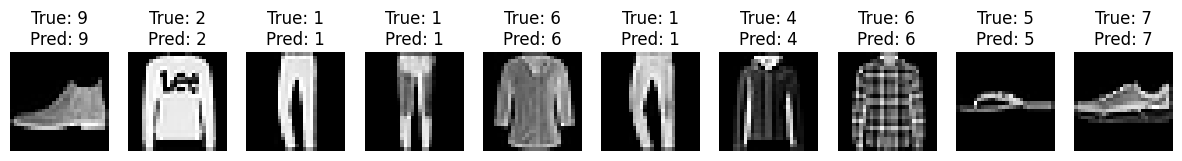

In [6]:
from utils import mlp_apply


# Define user parameters for mlp_apply ( Here it is simply the first 10 images from the test dataset)
test_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Applying the mlp model
mlp_apply(mlp_model, test_dataset, test_indexes)

### Train and apply model

Use your functions defined above to train the three models. Try different values of the hyper-paramter settings. You shall achieve at least 80% test accuracy with all your models and at least 90% test accuracy with the best one.

Describe briefly your three models and your hyper-parameter setups and comment your results.

**Compare the performance of the three models using suitable supportive tables and graphs, and complemented by relevant comments.**

Training MLP with linear layers and ReLU...
Epoch [1/30], Train Loss: 0.5056, Test Loss: 0.4265, Test Accuracy: 0.8406
Epoch [2/30], Train Loss: 0.3742, Test Loss: 0.4083, Test Accuracy: 0.8547
Epoch [3/30], Train Loss: 0.3332, Test Loss: 0.3751, Test Accuracy: 0.8651
Epoch [4/30], Train Loss: 0.3070, Test Loss: 0.3691, Test Accuracy: 0.8690
Epoch [5/30], Train Loss: 0.2903, Test Loss: 0.3278, Test Accuracy: 0.8824
Epoch [6/30], Train Loss: 0.2738, Test Loss: 0.3519, Test Accuracy: 0.8792
Epoch [7/30], Train Loss: 0.2585, Test Loss: 0.3598, Test Accuracy: 0.8753
Epoch [8/30], Train Loss: 0.2424, Test Loss: 0.3289, Test Accuracy: 0.8832
Epoch [9/30], Train Loss: 0.2292, Test Loss: 0.3437, Test Accuracy: 0.8853
Epoch [10/30], Train Loss: 0.2195, Test Loss: 0.3401, Test Accuracy: 0.8869
Epoch [11/30], Train Loss: 0.2076, Test Loss: 0.3856, Test Accuracy: 0.8816
Epoch [12/30], Train Loss: 0.2002, Test Loss: 0.3715, Test Accuracy: 0.8830
Epoch [13/30], Train Loss: 0.1898, Test Loss: 0.3578,

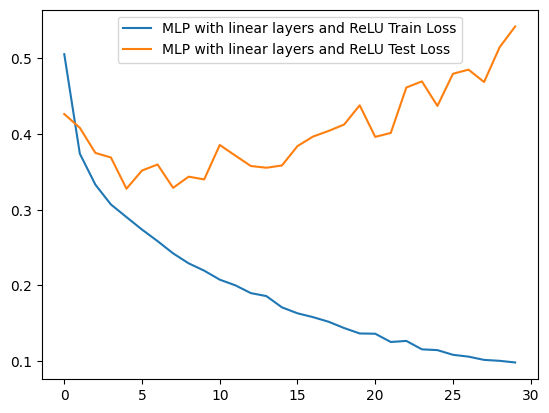


Results for MLP with linear layers, ReLU, and Dropout:
Final Test Accuracy: 0.8895


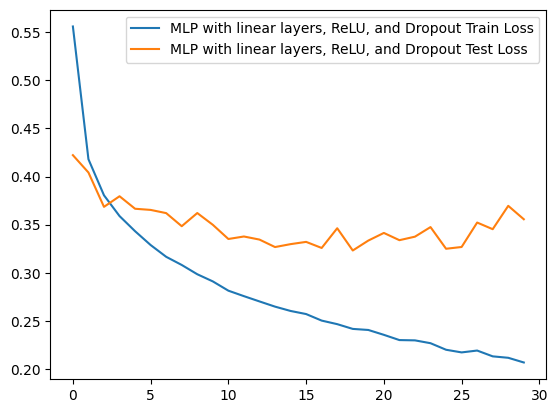


Results for MLP with linear layers, ReLU, Dropout, and Batch Norm:
Final Test Accuracy: 0.9037


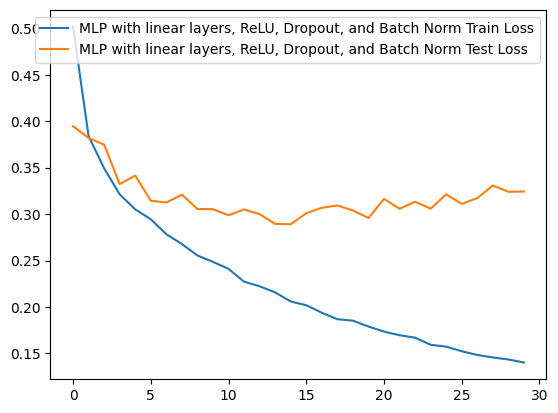

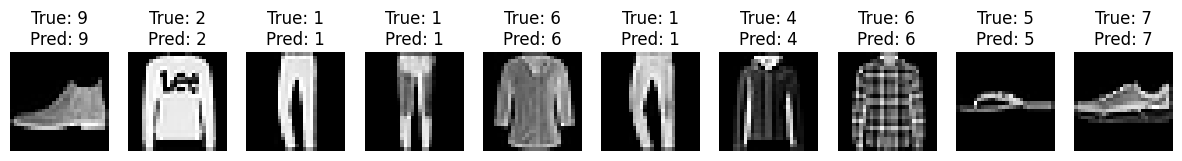

In [7]:
import matplotlib.pyplot as plt

# Model configurations
configurations = [
    {
        "name": "MLP with linear layers and ReLU",
        "hidden_layers": [512, 256, 128],
        "activation_fn": nn.ReLU,
        "dropout_rate": 0.0,
        "use_batch_norm": False
    },
    {
        "name": "MLP with linear layers, ReLU, and Dropout",
        "hidden_layers": [512, 256, 128],
        "activation_fn": nn.ReLU,
        "dropout_rate": 0.2,
        "use_batch_norm": False
    },
    {
        "name": "MLP with linear layers, ReLU, Dropout, and Batch Norm",
        "hidden_layers": [512, 256, 128],
        "activation_fn": nn.ReLU,
        "dropout_rate": 0.2,
        "use_batch_norm": True
    }
]

# Train and evaluate models
results = []
for config in configurations:
    print(f"Training {config['name']}...")
    model, train_loss, test_loss, test_accuracy = utils.mlp_train(
        train_loader=train_loader,
        test_loader=test_loader,
        input_size=input_size,
        hidden_layers=config['hidden_layers'],
        output_size=output_size,
        activation_fn=config['activation_fn'],
        dropout_rate=config['dropout_rate'],
        use_batch_norm=config['use_batch_norm'],
        num_epochs=num_epochs,
        learning_rate=learning_rate
    )
    results.append({
        "name": config['name'],
        "model": model,
        "train_loss": train_loss,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    })

# Display results
for result in results:
    print(f"\nResults for {result['name']}:")
    print(f"Final Test Accuracy: {result['test_accuracy'][-1]:.4f}")
    plt.plot(result['train_loss'], label=f"{result['name']} Train Loss")
    plt.plot(result['test_loss'], label=f"{result['name']} Test Loss")
    plt.legend()
    plt.show()

# Apply the best model out of the three
best_model = results[-1]['model']
utils.mlp_apply(best_model, test_dataset, test_indexes)


In [8]:
best_model

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=128, out_features=10, bias=True)
  )
)